Importing essential libraries

In [88]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [89]:
human  = pd.read_table('data/human_data.txt')
human['species'] = 'Human'
dog = pd.read_table('data/dog_data.txt')
dog['species'] = 'Dog'
chimp = pd.read_table('data/chimp_data.txt')
chimp['species'] = 'Chimp'
df = pd.concat([human,dog,chimp], ignore_index = True)
df['length'] = df['sequence'].str.len()
df = df.drop(columns='class')
print(f"Total sequences: {len(df)}")
print(df['species'].value_counts())

Total sequences: 6882
species
Human    4380
Chimp    1682
Dog       820
Name: count, dtype: int64


Visualizing the data before cleaning

In [90]:
print(df['sequence'])
print(f"\n{human.describe()}")
print(f"\n{df.describe()}")
print(f"\n{df.head}")
print(df.columns)
print(type(df))

0       ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...
1       ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...
2       ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...
3       ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...
4       ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...
                              ...                        
6877    ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...
6878    ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...
6879    ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...
6880    ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...
6881    ATGTTGCCCAGCTGTGGCAAGATCTTGACTGGGTGTAAGAATATGC...
Name: sequence, Length: 6882, dtype: str

             class
count  4380.000000
mean      3.504566
std       2.132134
min       0.000000
25%       2.000000
50%       4.000000
75%       6.000000
max       6.000000

             length
count   6882.000000
mean    1518.840889
std     1392.630595
min        5.000000
25%      511.000000
50%     1161.000000
75%     

                                               sequence species  length
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...   Human     207
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...   Human     681
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...   Human    1686
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...   Human    1206
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...   Human    1437
...                                                 ...     ...     ...
6877  ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...   Chimp    1944
6878  ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...   Chimp    2001
6879  ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...   Chimp     987
6880  ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...   Chimp    2001
6881  ATGTTGCCCAGCTGTGGCAAGATCTTGACTGGGTGTAAGAATATGC...   Chimp     690

[6882 rows x 3 columns]


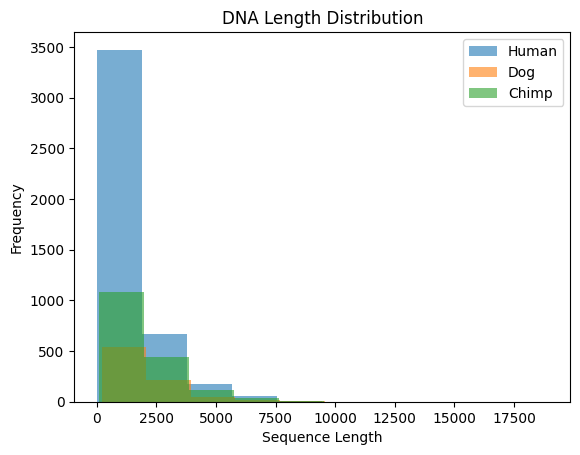

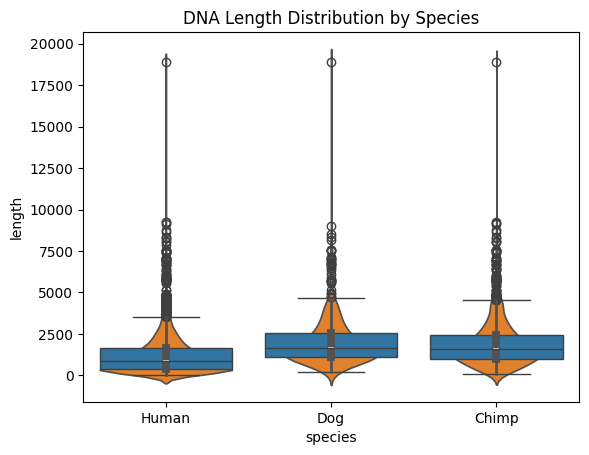

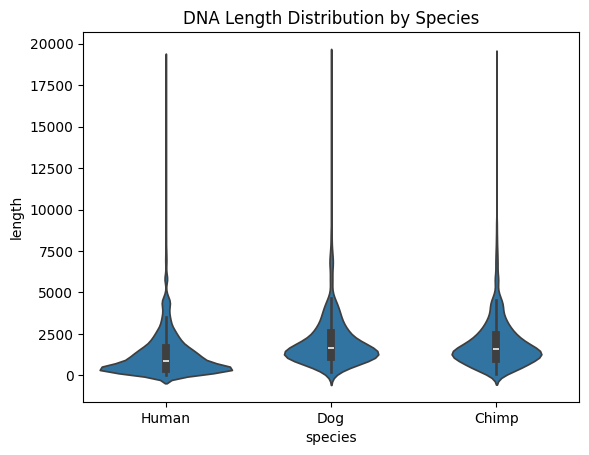

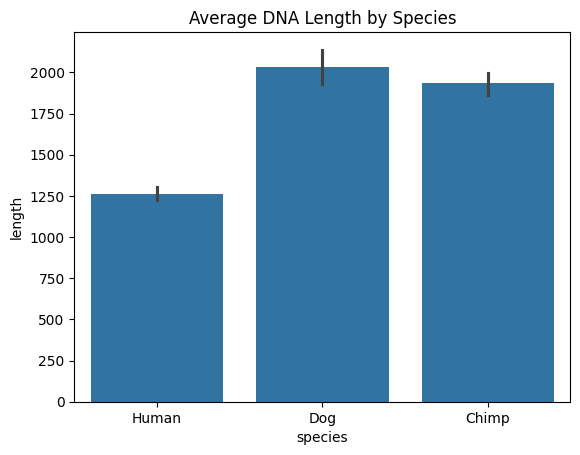

In [91]:
print(df)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['length'],alpha = 0.6, label = species)

plt.legend()
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("DNA Length Distribution")
plt.show()

sns.boxplot(data = df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")

sns.violinplot(data=df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")
plt.show()

sns.violinplot(data=df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")
plt.show()

sns.barplot(data = df, x = 'species', y = 'length')
plt.title("Average DNA Length by Species")
plt.show()

Cleaning the sequences

In [ ]:
valid_pattern = re.compile(r'^[ACTGactg]+$')
df = df.dropna(subset=['sequence','species'])
print(f"\n{df.head}")
df = df[df['sequence'].str.len() > 50]
df = df[df['sequence'].apply(lambda s: bool(valid_pattern.match(s)))]
df['sequence'] = df['sequence'].str.upper
print(f"\n{df.head}")
print(f"Clean sequences: {len(df)}")


Cleaning sequences...


<bound method NDFrame.head of                                                sequence species  length
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...   Human     207
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...   Human     681
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...   Human    1686
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...   Human    1206
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...   Human    1437
...                                                 ...     ...     ...
6877  ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...   Chimp    1944
6878  ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...   Chimp    2001
6879  ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...   Chimp     987
6880  ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...   Chimp    2001
6881  ATGTTGCCCAGCTGTGGCAAGATCTTGACTGGGTGTAAGAATATGC...   Chimp     690

[6882 rows x 3 columns]>

<bound method NDFrame.head of                         

Visualizing the data after cleaning

                                               sequence species  length
0     <bound method StringMethods.upper of <pandas.c...   Human     207
1     <bound method StringMethods.upper of <pandas.c...   Human     681
2     <bound method StringMethods.upper of <pandas.c...   Human    1686
3     <bound method StringMethods.upper of <pandas.c...   Human    1206
4     <bound method StringMethods.upper of <pandas.c...   Human    1437
...                                                 ...     ...     ...
6877  <bound method StringMethods.upper of <pandas.c...   Chimp    1944
6878  <bound method StringMethods.upper of <pandas.c...   Chimp    2001
6879  <bound method StringMethods.upper of <pandas.c...   Chimp     987
6880  <bound method StringMethods.upper of <pandas.c...   Chimp    2001
6881  <bound method StringMethods.upper of <pandas.c...   Chimp     690

[6480 rows x 3 columns]


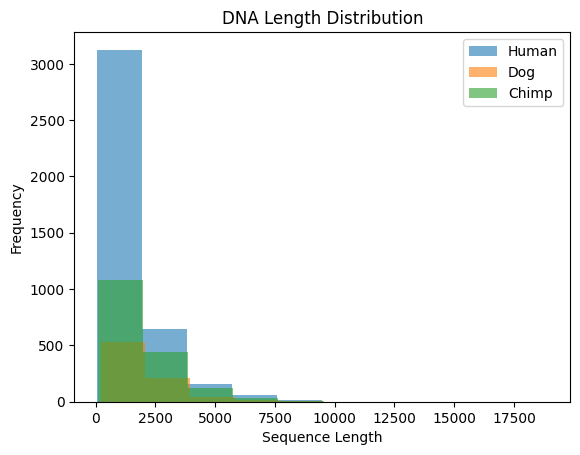

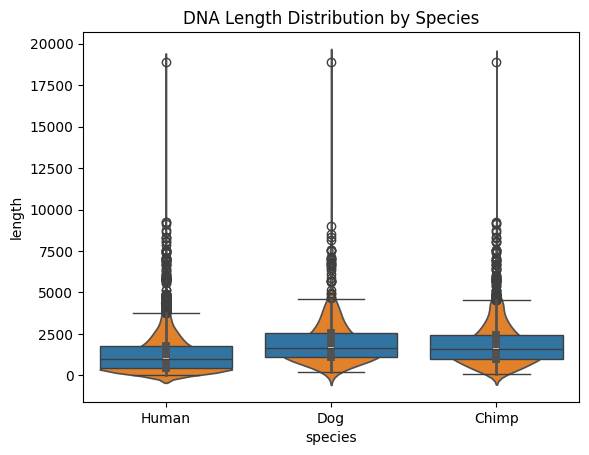

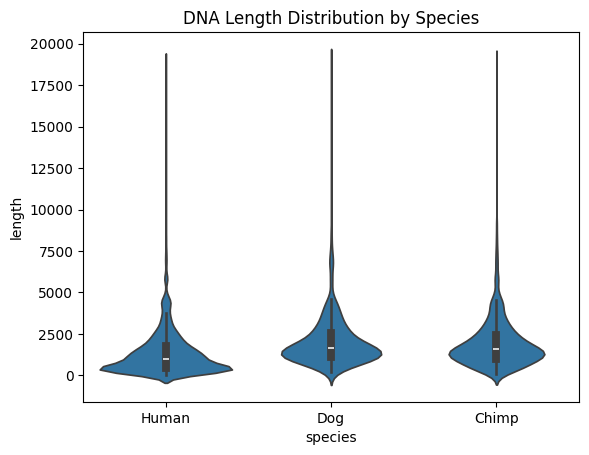

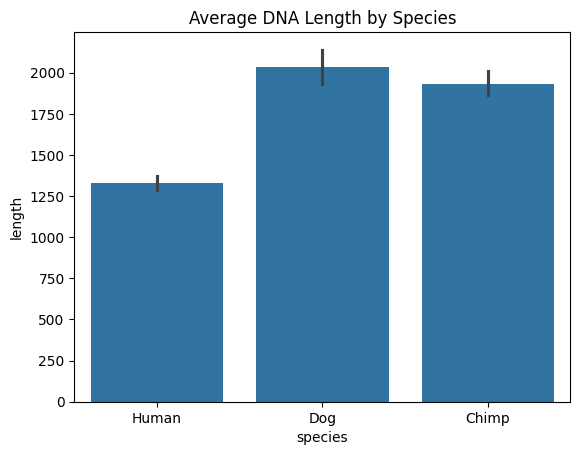

In [93]:
print(df)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['length'],alpha = 0.6, label = species)

plt.legend()
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("DNA Length Distribution")
plt.show()

sns.boxplot(data = df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")

sns.violinplot(data=df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")
plt.show()

sns.violinplot(data=df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")
plt.show()

sns.barplot(data = df, x = 'species', y = 'length')
plt.title("Average DNA Length by Species")
plt.show()

K-mer feature extraction